In [4]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn . preprocessing import PolynomialFeatures

In [5]:
train = pd.read_csv('train.csv')
valid=pd.read_csv('valid.csv')
test=pd.read_csv('test.csv')

In [6]:
# feature1 = train.columns[0]
# feature2 = train.columns[1]
# target_col = train.columns[2]

# print(f"feature 1 : {feature1}, feature 2: {feature2} and target value/output : {target_col}")

In [7]:
# features = train.columns[0:2].tolist()
# features

In [8]:
X_train = train.iloc[:,0:-1]
y_train = train.iloc[:,-1]

X_valid = valid.iloc[:,0:-1]
y_valid = valid.iloc[:,-1]

X_test = test.iloc[:,0:-1]
y_test = test.iloc[:,-1]

In [9]:
# Training the model
degrees = [2, 3, 4, 5]
rmse_train ={}
rmse_valid ={}
rmse_test ={}

y_train_pred ={}
y_valid_pred ={}
y_test_pred ={}


for d in degrees:
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train)
    X_valid_poly = poly.transform(X_valid)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly,y_train)

    y_train_pred[d] = model.predict(X_train_poly)
    y_valid_pred[d] = model.predict(X_valid_poly)
    y_test_pred[d] = model.predict(X_test_poly)

    rmse_train[d] = np.sqrt(mean_squared_error(y_train, y_train_pred[d]))
    rmse_valid[d] = np.sqrt(mean_squared_error(y_valid, y_valid_pred[d]))
    rmse_test[d] = np.sqrt(mean_squared_error(y_test, y_test_pred[d]))

In [10]:
best_degree = 2
for d in degrees:
    print(f"For degree: {d}")
    print(f"RMSE train is: {rmse_train[d]}")
    print(f"RMSE valid is: {rmse_valid[d]}")
    print(f"RMSE test is: {rmse_test[d]}")
    
    if rmse_valid[d] < rmse_valid[best_degree]:
        best_degree = d
    
    print("\n\n")

print("Best degree based on validation data: ", best_degree)

For degree: 2
RMSE train is: 0.41918615196336206
RMSE valid is: 0.4118078297300138
RMSE test is: 0.4407726105272322



For degree: 3
RMSE train is: 0.36419254424833636
RMSE valid is: 0.40577911543326617
RMSE test is: 0.44672490816850563



For degree: 4
RMSE train is: 0.3390183203997156
RMSE valid is: 35.237738607453316
RMSE test is: 4.256668145579916



For degree: 5
RMSE train is: 0.12446730404987036
RMSE valid is: 16276.233078263462
RMSE test is: 13404.689806648934



Best degree based on validation data:  3


In [11]:
poly = PolynomialFeatures(degree=best_degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly,y_train)

y_test_pred_best = model.predict(X_test_poly)

rmse_test_best = np.sqrt(mean_squared_error(y_test, y_test_pred_best))

print(f"RMSE for test data for best degree : {best_degree} is {rmse_test_best}")

RMSE for test data for best degree : 3 is 0.44672490816850563


In [12]:
rmse_valid

{2: 0.4118078297300138,
 3: 0.40577911543326617,
 4: 35.237738607453316,
 5: 16276.233078263462}

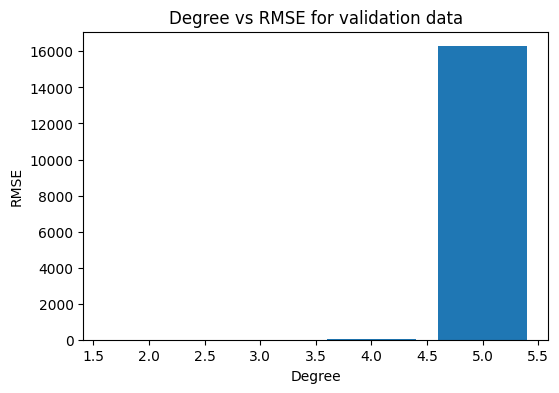

RMSE keys: dict_keys([2, 3, 4, 5]) and RMSE values: dict_values([0.4118078297300138, 0.40577911543326617, 35.237738607453316, 16276.233078263462])


In [13]:
plt.figure(figsize=(6,4))
plt.bar(rmse_valid.keys(), rmse_valid.values())
plt.xlabel("Degree")
plt.ylabel("RMSE")
plt.title("Degree vs RMSE for validation data")
plt.show()

print(f"RMSE keys: {rmse_valid.keys()} and RMSE values: {rmse_valid.values()}")

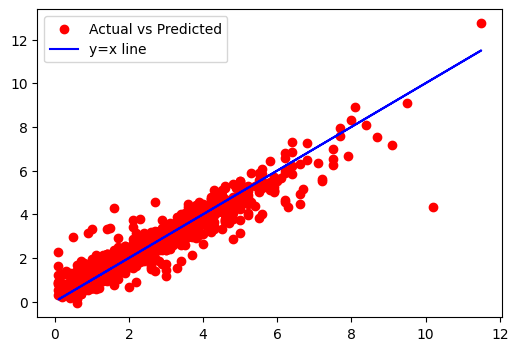

In [14]:
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_test_pred_best, color="red", label="Actual vs Predicted")
plt.plot(y_test, y_test, color="blue", label="y=x line")
plt.legend()
plt.show()

In [15]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
print(X_train_poly)

[[1.00000000e+00 1.28000000e+03 2.28000000e+02 ... 4.08040000e+02
  1.43298800e+01 5.03248360e-01]
 [1.00000000e+00 1.19000000e+03 1.54000000e+02 ... 2.71441000e+03
  3.51466600e+01 4.55085160e-01]
 [1.00000000e+00 1.20200000e+03 1.54000000e+02 ... 6.38401000e+03
  1.21871470e+02 2.32654009e+00]
 ...
 [1.00000000e+00 8.63000000e+02 6.60000000e+01 ... 1.14921000e+03
  2.26553700e+01 4.46624890e-01]
 [1.00000000e+00 8.97000000e+02 1.54000000e+02 ... 6.40090000e+02
  1.42312500e+01 3.16406250e-01]
 [1.00000000e+00 1.28300000e+03 1.54000000e+02 ... 6.50250000e+02
  1.98517500e+01 6.06062250e-01]]
